In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification,make_moons,make_circles,make_blobs
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
np.random.seed(7)

In [18]:
x,y = make_classification(n_samples=400,n_features=2,n_redundant=0,n_informative=2,n_clusters_per_class=1,class_sep=2.0,random_state=7)
xtr,xte,ytr,yte = train_test_split(x,y,test_size=0.3,random_state=7,stratify=y)

clf = Perceptron(max_iter=1000,eta0=0.1,random_state=7,tol=1e-5)
clf.fit(xtr,ytr)
pred = clf.predict(xte)
acc = accuracy_score(yte,pred)
print(f"accuracy : {acc:.3f}")

accuracy : 0.983


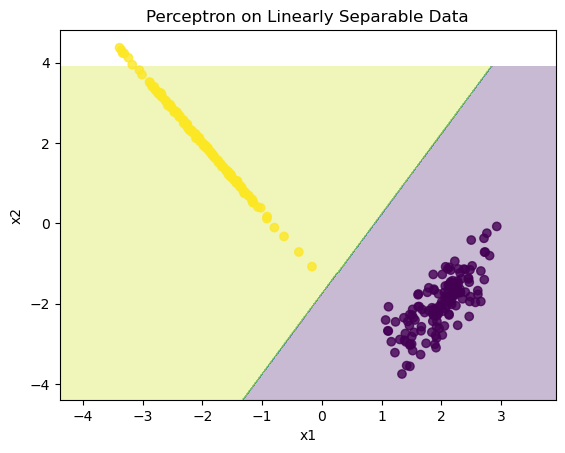

In [19]:
h = 0.02
x_min,x_max = x[:,0].min()-1,x[:,0].max()+1 
y_min,y_max = x[:,0].min()-1,x[:,0].max()+1 
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                    np.arange(y_min,y_max,h))
z= clf.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(xtr[:,0], xtr[:,1], c=ytr, alpha=0.8)
plt.title("Perceptron on Linearly Separable Data")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()

In [22]:
xm,ym = make_moons(n_samples=400,noise=0.2,random_state=7)
xm_tr,xm_te,ym_tr,ym_te = train_test_split(xm,ym)

p_moon = Perceptron(max_iter=2000,eta0=0.1,random_state=7,tol=1e-5)
p_moon.fit(xm_tr,ym_tr)
predm = p_moon.predict(xm_te)
accm = accuracy_score(ym_te,predm)
print(f" Accuracy (moon) : {accm:.2f}")


 Accuracy (moon) : 0.78


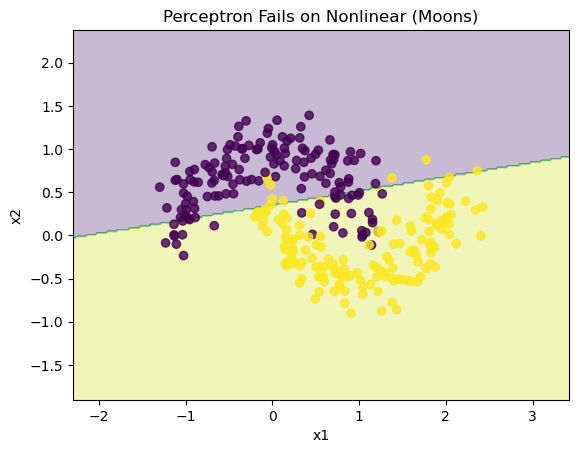

In [24]:
# Plot decision boundary
h = 0.02
x_min, x_max = xm[:,0].min()-1, xm[:,0].max()+1
y_min, y_max = xm[:,1].min()-1, xm[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = p_moon.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(xm_tr[:,0], xm_tr[:,1], c=ym_tr, alpha=0.8)
plt.title("Perceptron Fails on Nonlinear (Moons)")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()
